## What is OCR

Optical Character Recognition (OCR) is a technology used to convert different types of documents, such as scanned paper documents, PDF files, or images captured by a digital camera, into editable and searchable data. The primary function of OCR is to recognize text within these documents and convert it into a machine-readable form.

**`Uses of OCR:`**

`Document Digitization:` OCR is widely used to digitize printed documents, converting them into editable formats. This is particularly useful for archiving and retrieving information without manually inputting data.

`Business Process Automation:` In business environments, OCR streamlines processes by automating the data extraction from physical documents such as invoices, receipts, and forms, thus reducing the need for manual entry and improving accuracy.

`Accessibility:` OCR technology helps visually impaired individuals by converting written content into spoken words using text-to-speech technologies, thus making information more accessible.

`Translation and Language Recognition:` OCR can be used to translate documents by first converting scanned text to digital text, which can then be processed by translation software.

`Search and Retrieval:` OCR makes it possible to search for specific texts within a large volume of scanned documents, which is useful in legal, medical, and academic fields.

`Traffic and License Plate Recognition:` In the public safety sector, OCR technology is employed to automatically read vehicle license plates for traffic management and security purposes.

By converting static images of text into editable formats, OCR plays a critical role in numerous applications, enhancing efficiency and accessibility across various industries.

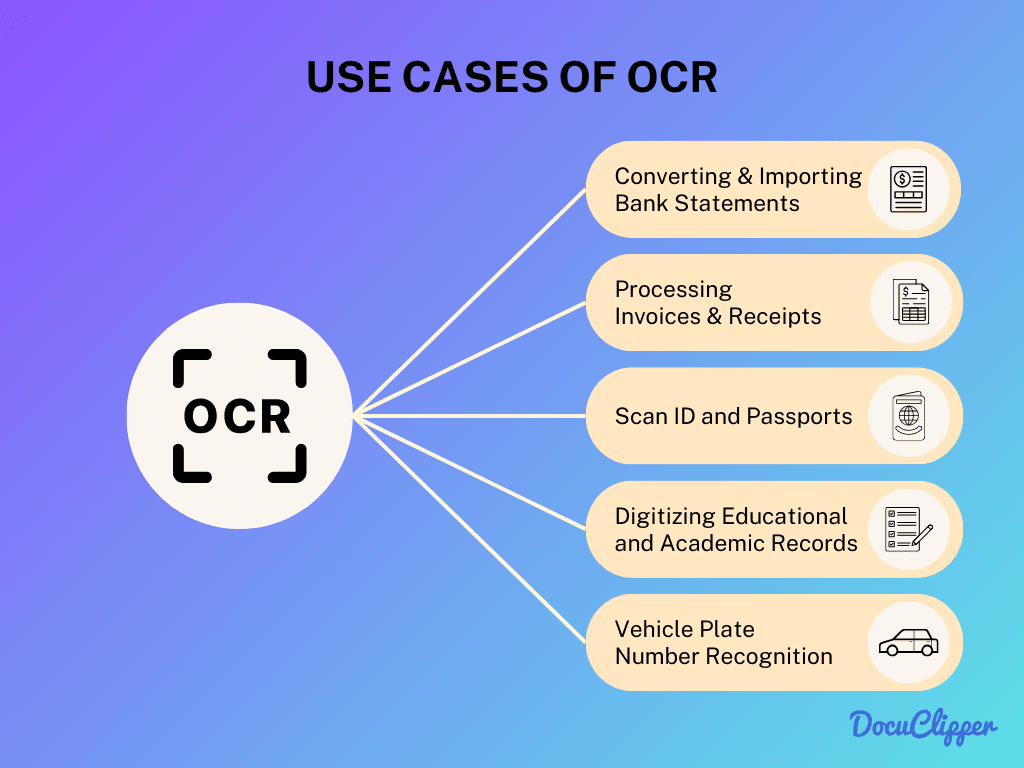

## Exploring OCR Engine

Text extraction can be achieved in two steps, i.e., `text detection` and `text recognition` or by training a single model to achieve both text detection and recognition. I'll me explaining the 2 steps process.

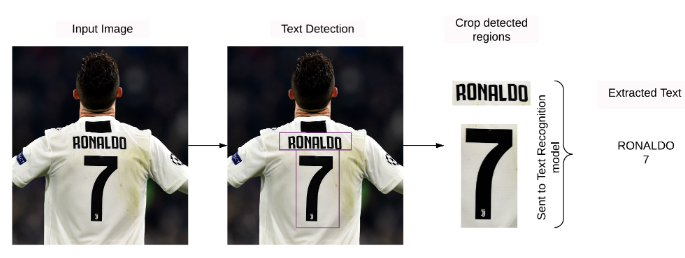

*`Text detection`* helps identify the region in the image where the text is present.  It takes in an image as an input, and the outputs bounding boxes.

*`Text recognition`* extracts the text from the input image using the bounding boxes obtained from the text detection model. It takes in an image and some bounding boxes as inputs and outputs some raw text.

Text detection is very similar to the object detection task where the object which needs to be detected is nothing but the text. We can use algorithms like RCNN, Faster-RCNN. SSD, YOLO.
Here, we will mainly focus on explaining the CRNN-CTC network for text recognition.

### Text Recognition Pipeline

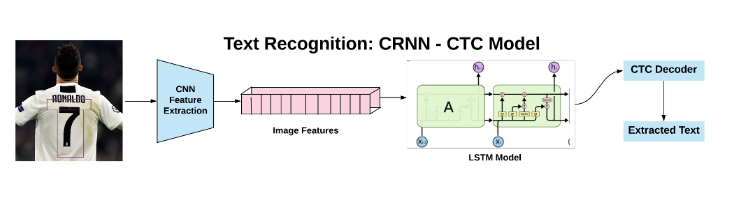


After the text detection step, regions, where the text is present, are cropped and sent through convolutional layers to get the features from the image. Later these features are fed to many-to-many LSTM architecture, which outputs softmax probabilities over the vocabulary.  These outputs from different time steps are fed to the CTC decoder to finally get the raw text from images.

**`CNN Features and Receptive Field`**


In CNN the kernel slides over the original image pixel by pixel and does some
math calculations to get the values of the new “convolved” image on
the next layer. The area of the image that the filter convolves is called
the `receptive field`. 

In the initial layers, the receptive field is small because each output feature only sees a small patch of the input image directly through the filter applied.
As you progress deeper into the network, each layer aggregates the information from previous layers, expanding the area of the input image that influences the output features. Thus, deeper layers have a larger receptive field and capture more global information rather than local details

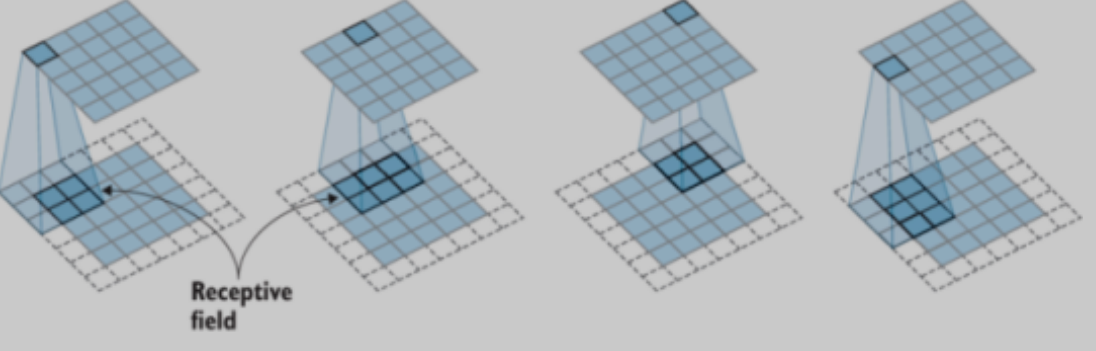


A grayscale image with width 128 and height 32 is sent through a series of convolutional & max-pooling layers.  Layers are designed in such a manner that we obtain feature maps of the shape   (None,  1,  31,  512) .  "None" here is nothing but the batch size which could take any value. 

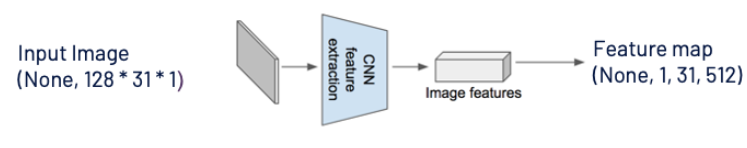

In convolutional networks, you look at an image through a smaller window and move that window to the right and down. That way you can find features in that window, for example a horizontal line or a vertical line or a curve etc… What exactly a convolutional neural network considers an important feature is defined while learning.

Wherever you find those features, you report that in the feature maps. A certain combination of features in a certain area can signal a larger, more complex feature exists there.

For example, your first feature map could for example looks for curves. The next feature map could look at a combination of curves that build circles. The next feature map could detect a bicycle from lines and circle features.

**`CNN Features to LSTM Model`**

(None,  1,  31,  512)  can be easily reshaped to   (None,  31,  512) , and 31 corresponds to the number of time steps, and 512 is nothing but the number of features at every time step.  One can relate this to training any LSTM model with word embeddings like word2vec, Glove, fastText, and the input shape is usually like  (batch_size, no_time_steps, word_embedding_dimension).

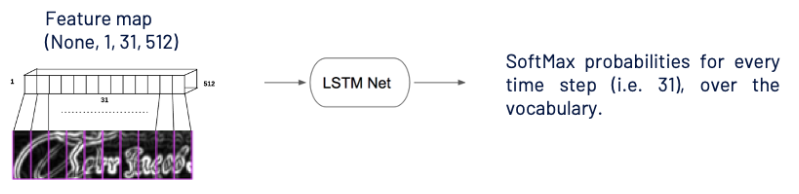


Feature maps coming from CNN layers are fed to the LSTM model, as shown above.  You might be thinking now that LSTM models are known to work with sequential data and how feature maps are sequential!!  Receptive fields play a significant role here. As one can see from the above image first value(first row, first column) in the feature map has visibility on the left part of the input image and last value(first row, last column) has visibility on the end part of the image, and yes this is sequential !!
From the LSTM model for every time step i.e., 31, we get a softmax probability over vocabulary.  Now let us move on to the exciting part, calculating the loss value for this architecture setup. 



**`CTC(Connectionist Temporal Classification) Loss`**

Connectionist Temporal Classification (CTC) loss is a popular method used in machine learning for training sequence-to-sequence models, especially when the alignment between the inputs and the outputs is unknown. It's particularly useful in tasks like speech recognition, handwriting recognition, and other forms of sequence prediction where the timing of the output labels relative to the input sequence is not predefined.

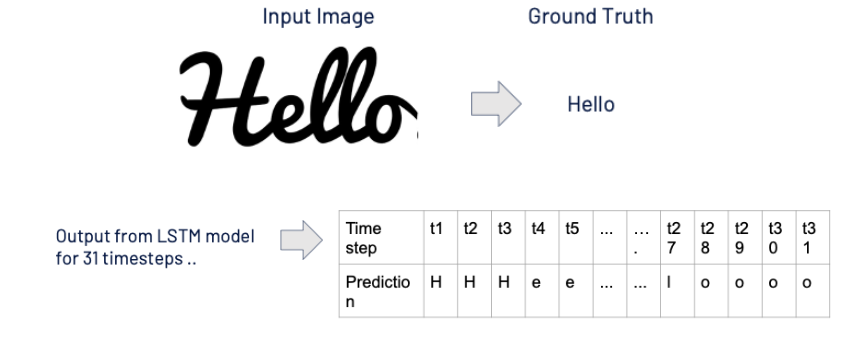

The length of ground truth is 5, which is not equal to the length of prediction i.e., 31.

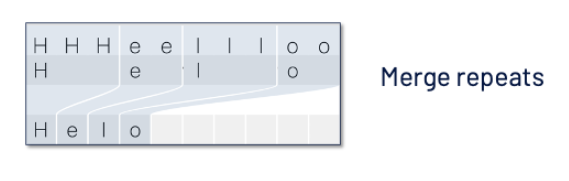

If we merge the repeats, we lose the repetitions, as shown in the above image.  With just merging, we end up with a single letter "l," which was supposed to be "ll." So a special character called "blank character" is introduced to avoid this. 

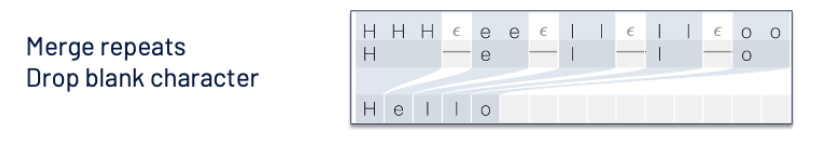

Now the decode operation consists of 2 steps:
1. Merge repeats 
2. Remove blank characters. 
Now you can see "ll," which is retained. 

For simplicity lets say,
the vocabulary is  { A, B, - } 

we have predictions for 3-time steps from LSTM network (SoftMax probabilities over vocabulary at  t1, t2, t3 )


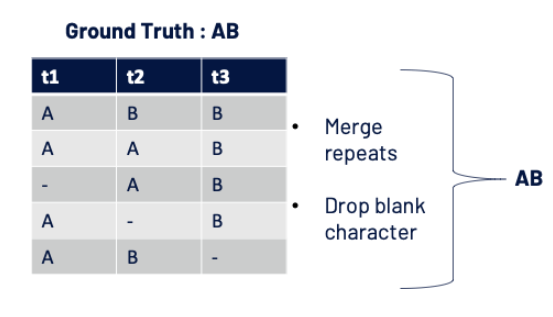

Let us say the Softmax probabilities for 3-time steps are as below:

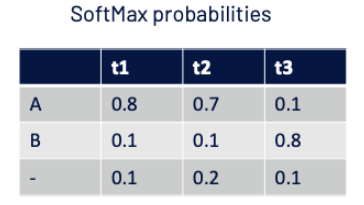

Loss is calculated as  - log(Probability of getting ground truth) 
Probability of getting GT AB:  = P(ABB) + P(AAB) + P(-AB) + P(A-B) + P(AB-)
Score for one path: AAB  =  (0.8 x 0.7 x 0.8)  and similarly for other paths. 



Creating an OCR engine is a challenging research task and
requires great knowledge in image processing, feature
extraction and machine learning. However, there are several
open source projects that provide OCR framework and are
widely used in the creation of OCR-related applications. In
order not to reinvent the wheel and also to save time for
development

### OCR using pytesseract

In [1]:
import cv2
import matplotlib.pyplot as plt

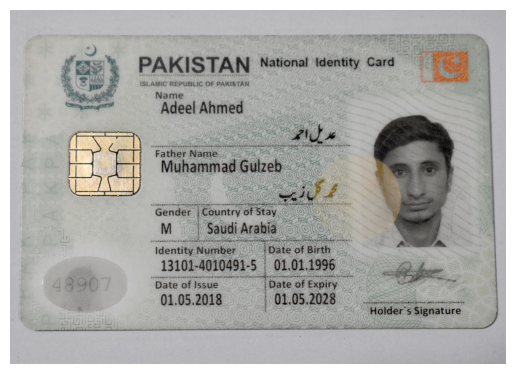

In [2]:

# Load the image
# img = cv2.imread("data\\01_raw_data\\bibek_pan.jpg")
img = cv2.imread("02.jpg")

# displaying image using matplotlib
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis('off')
plt.show()

contours (0, 0, 1600, 1142)
Area 1820612.5


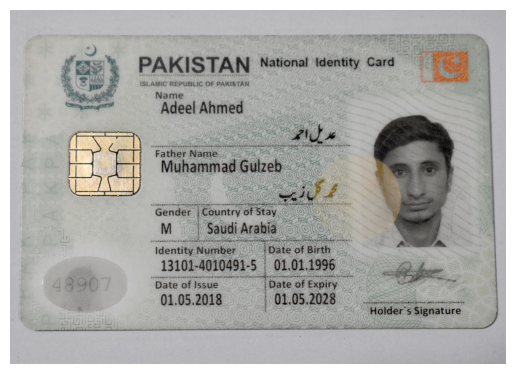

In [3]:
gray_img =  cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred =  cv2.GaussianBlur(gray_img, (3, 3), 0)
adp_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 2)

contours, _ = cv2.findContours(adp_thresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)

# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area

x, y, w, h = cv2.boundingRect(largest_contour)

print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_img[y:y+h, x:x+w]

plt.imshow(contour_id)
plt.axis('off')
plt.show()

In [4]:
gray_contour_id =  cv2.cvtColor(contour_id, cv2.COLOR_RGB2GRAY)


In [6]:
import easyocr

In [1]:
import easyocr
import cv2  # OpenCV for loading the image
import numpy as np

# Path to the image file
image_path = '02.jpg'

# Load the image using OpenCV
img_np = cv2.imread(image_path)

# Initialize EasyOCR Reader
reader = easyocr.Reader(['en'], gpu=False)

# Read text from the image
result = reader.readtext(img_np)

# Print the result
print(result)


Using CPU. Note: This module is much faster with a GPU.


[([[407, 140], [784, 140], [784, 217], [407, 217]], 'PAKISTAN', 0.9998127342888874), ([[802, 147], [1134, 147], [1134, 200], [802, 200]], 'National Identity', 0.717397636218895), ([[1146, 148], [1244, 148], [1244, 190], [1146, 190]], 'Card', 0.9997587203979492), ([[414, 228], [774, 228], [774, 254], [414, 254]], 'ISLAMIC REPUBLIC OF PAKISTAN', 0.9861856027634153), ([[468, 262], [564, 262], [564, 294], [468, 294]], 'Name', 0.9999951720237732), ([[482, 290], [760, 290], [760, 346], [482, 346]], 'Adeel Ahmed', 0.999447976647569), ([[913, 371], [1059, 371], [1059, 435], [913, 435]], '2ij*', 0.15629376471042633), ([[464, 445], [675, 445], [675, 485], [464, 485]], 'Father Name', 0.6865696595967414), ([[484, 478], [884, 478], [884, 534], [484, 534]], 'Muhammad Gulzeb', 0.6857445823828913), ([[465, 637], [593, 637], [593, 673], [465, 673]], 'Gender', 0.6611960704391551), ([[616, 633], [866, 633], [866, 676], [616, 676]], 'Country of Stay ', 0.7168963620529213), ([[485, 685], [525, 685], [525, 

In [7]:
img_path = '02.jpg'
reader = easyocr.Reader(['en'])
result = reader.readtext(img_path)
confidence_threshold =  .80
filtered_text = ""  # Initialize an empty string to store filtered text
for text in result:
    bounding_box, recognized_text, confidence = text
    if confidence > confidence_threshold:
        filtered_text += recognized_text + "|"  # Append filtered text with newline

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
filtered_text

'PAKISTAN|Card|ISLAMIC REPUBLIC OF PAKISTAN|Name|Adeel Ahmed|M|Saudi Arabia|Date of Birth|13101-4010491-5|48907|01.05.2018|'